<font size = "5"> *Kiran Songire(U01720594)*</font>

In [1]:
#Import All the Libraries into file.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fastparquet import ParquetFile

#"C:\Users\kiran\OneDrive\Desktop\Deep Learning\yellow_tripdata_2020-03.parquet"
df_march = pd.read_parquet('C:/Users/kiran/OneDrive/Desktop/Deep Learning/yellow_tripdata_2020-03.parquet', engine='fastparquet')
df_may = pd.read_parquet('C:/Users/kiran/OneDrive/Desktop/Deep Learning/yellow_tripdata_2020-05.parquet', engine='fastparquet')
df_jan = pd.read_parquet('C:/Users/kiran/OneDrive/Desktop/Deep Learning/yellow_tripdata_2020-01.parquet', engine='fastparquet')
df_march.info()
df_may.info()
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007687 entries, 0 to 3007686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

### Lets use tensorflow for information analysis

In [2]:
import tensorflow_data_validation as tfdv

In [3]:
train_march_stats = tfdv.generate_statistics_from_dataframe(df_march)
tfdv.visualize_statistics(train_march_stats)

In [4]:
# Infer schema based on statistics
schema = tfdv.infer_schema(train_march_stats)
# Display schema inline in table format
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,optional,single,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,optional,single,-
'store_and_fwd_flag',STRING,optional,single,'store_and_fwd_flag'
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


,Values
Domain,
'store_and_fwd_flag',"'N', 'Y'"


### Calculate the null values into the dataset above
### Look for missing, null, NaN records. 


In [5]:
df_march.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            37808
trip_distance                  0
RatecodeID                 37808
store_and_fwd_flag         37808
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       37808
airport_fee              3007687
dtype: int64

In [6]:
df_march['passenger_count'] = df_march['passenger_count'].fillna(0)
df_march['RatecodeID'] = df_march['RatecodeID'].fillna(0)
df_march['store_and_fwd_flag'] = df_march['store_and_fwd_flag'].fillna(0)
df_march['congestion_surcharge'] = df_march['congestion_surcharge'].fillna(0)


df_march.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
airport_fee              3007687
dtype: int64

### We can drop columns like airport_fee with maximum missing value

In [7]:
df_march = df_march.drop('airport_fee', axis =1)

### Let's calculate target variable for our dataset

In [8]:
df_march["trip_duration"] = (df_march['tpep_dropoff_datetime'] - df_march['tpep_pickup_datetime'])
df_march["trip_duration"] = df_march["trip_duration"].dt.seconds/60

In [9]:
# Checking the size of dataset.
df_march.shape

(3007687, 19)

In [10]:
df_march.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007687 entries, 0 to 3007686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  trip_duration         

###  nunique: Count number of distinct elements in specified axis.

In [11]:
df_march.nunique()

VendorID                       4
tpep_pickup_datetime     1226436
tpep_dropoff_datetime    1226846
passenger_count               10
trip_distance               3963
RatecodeID                     8
store_and_fwd_flag             3
PULocationID                 260
DOLocationID                 261
payment_type                   5
fare_amount                 6402
extra                        302
mta_tax                        7
tip_amount                  3042
tolls_amount                 664
improvement_surcharge          3
total_amount               10882
congestion_surcharge           6
trip_duration               9835
dtype: int64

In [12]:
df_march.head()
print(df_march.VendorID.value_counts())
print(df_march.passenger_count .value_counts())
print(df_march.RatecodeID.value_counts())
print(df_march.store_and_fwd_flag.value_counts())
print(df_march.payment_type.value_counts())
print(df_march.mta_tax.value_counts())
print(df_march.improvement_surcharge.value_counts())
print(df_march.congestion_surcharge.value_counts())
print(df_march.trip_distance.value_counts())


2    2018718
1     988484
6        476
5          9
Name: VendorID, dtype: int64
1.0    2187411
2.0     407514
3.0     106518
0.0     101239
5.0      96974
6.0      59573
4.0      48434
7.0         10
9.0          9
8.0          5
Name: passenger_count, dtype: int64
1.0     2886847
2.0       58968
0.0       37808
5.0       15847
3.0        5854
4.0        2228
99.0        120
6.0          15
Name: RatecodeID, dtype: int64
N    2941898
0      37808
Y      27981
Name: store_and_fwd_flag, dtype: int64
1    2211073
2     732096
0      37808
3      17048
4       9662
Name: payment_type, dtype: int64
 0.50         2969081
 0.00           27790
-0.50           10801
 3.30               9
 0.35               4
 500000.50          1
 0.59               1
Name: mta_tax, dtype: int64
 0.3    2994562
-0.3      11027
 0.0       2098
Name: improvement_surcharge, dtype: int64
 2.50    2703215
 0.00     295858
-2.50       8587
 0.75         25
-0.75          1
 1.00          1
Name: congestion_surchar

### Checking one by one if the data has correct valuecounts as that of metadata ....OUTLIERS

In [13]:
df_march.RatecodeID.value_counts()

1.0     2886847
2.0       58968
0.0       37808
5.0       15847
3.0        5854
4.0        2228
99.0        120
6.0          15
Name: RatecodeID, dtype: int64

In [14]:
df_march.VendorID.value_counts()

2    2018718
1     988484
6        476
5          9
Name: VendorID, dtype: int64

In [15]:
df_march.store_and_fwd_flag.value_counts()  #after conversion to numeric

N    2941898
0      37808
Y      27981
Name: store_and_fwd_flag, dtype: int64

In [16]:
df_march.payment_type.value_counts()

1    2211073
2     732096
0      37808
3      17048
4       9662
Name: payment_type, dtype: int64

### No type 0 of payment method.

### vendorID only 2 records.
    Hence drop other 2
### RateCodeId is 6
    Hence drop 2
### Store and fwd flag is 2
    Hence drop 1
 

In [17]:
df_march = df_march.drop(df_march[(df_march.VendorID > 2)].index)

In [18]:
df_march = df_march.drop(df_march[(df_march.payment_type == 0)].index)

In [19]:
df_march= df_march.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag'],axis=1)

In [20]:
df_march

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1,1.0,4.70,1.0,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5,30.483333
1,2,1.0,0.00,1.0,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.450000
2,1,1.0,1.10,1.0,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,6.966667
3,2,2.0,0.87,1.0,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,3.066667
4,1,0.0,4.40,1.0,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,15.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969874,2,5.0,0.52,1.0,236,236,2,4.0,0.5,0.5,0.00,0.0,0.3,7.80,2.5,2.833333
2969875,2,5.0,2.35,1.0,263,166,1,10.5,0.5,0.5,2.86,0.0,0.3,17.16,2.5,10.983333
2969876,2,5.0,1.33,1.0,140,162,1,7.0,0.5,0.5,2.20,0.0,0.3,13.00,2.5,7.100000
2969877,2,6.0,0.87,1.0,140,229,1,5.0,0.5,0.5,2.64,0.0,0.3,11.44,2.5,3.333333


In [21]:
temp = df_march[(df_march["passenger_count"] == 7) | (df_march["passenger_count"] == 8) | (df_march["passenger_count"] == 9)].index
df_march.drop(temp, inplace=True)

In [22]:
df_march.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2969855.0,1.667224,0.471207,1.00,1.000000,2.00,2.00,2.000000e+00
passenger_count,2969855.0,1.467424,1.119936,0.00,1.000000,1.00,1.00,6.000000e+00
trip_distance,2969855.0,2.822206,3.613030,0.00,0.990000,1.64,2.98,3.109000e+02
RatecodeID,2969855.0,1.051352,0.710854,1.00,1.000000,1.00,1.00,9.900000e+01
PULocationID,2969855.0,163.761163,66.402949,1.00,114.000000,162.00,234.00,2.650000e+02
DOLocationID,2969855.0,161.328406,70.595992,1.00,107.000000,162.00,234.00,2.650000e+02
payment_type,2969855.0,1.267748,0.476508,1.00,1.000000,1.00,2.00,4.000000e+00
fare_amount,2969855.0,12.547020,389.581948,-1259.00,6.500000,9.00,13.50,6.711001e+05
extra,2969855.0,1.260976,290.139013,-7.00,0.000000,0.50,2.50,5.000008e+05
mta_tax,2969855.0,0.661723,290.136522,-0.50,0.500000,0.50,0.50,5.000005e+05


In [23]:
# Infer schema based on statistics
schema = tfdv.infer_schema(train_march_stats)
# Display schema inline in table format
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,optional,single,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,optional,single,-
'store_and_fwd_flag',STRING,optional,single,'store_and_fwd_flag'
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


,Values
Domain,
'store_and_fwd_flag',"'N', 'Y'"


In [24]:
df_march.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969855 entries, 0 to 2969878
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   PULocationID           int64  
 5   DOLocationID           int64  
 6   payment_type           int64  
 7   fare_amount            float64
 8   extra                  float64
 9   mta_tax                float64
 10  tip_amount             float64
 11  tolls_amount           float64
 12  improvement_surcharge  float64
 13  total_amount           float64
 14  congestion_surcharge   float64
 15  trip_duration          float64
dtypes: float64(12), int64(4)
memory usage: 385.2 MB


In [25]:
df_marchcolumns = list(df_march.columns)

In [26]:
df_marchcolumns

['VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'trip_duration']

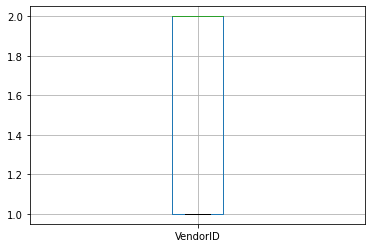

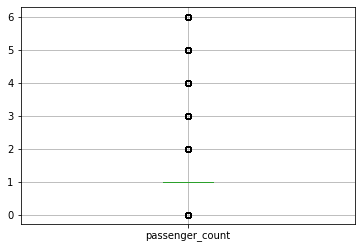

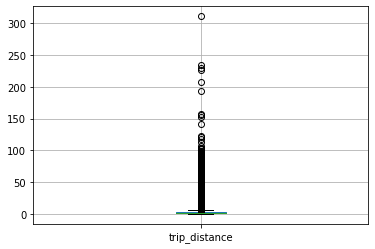

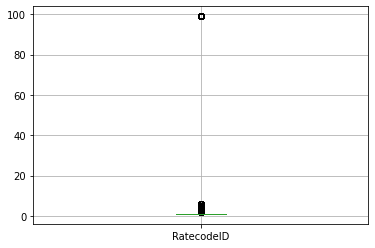

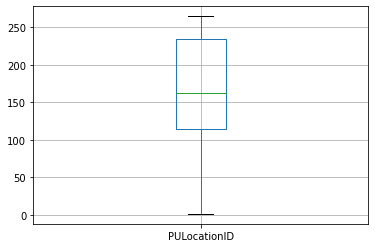

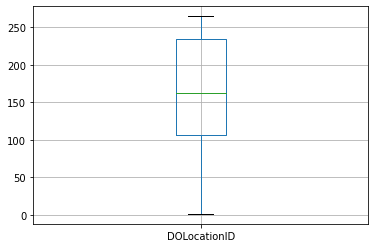

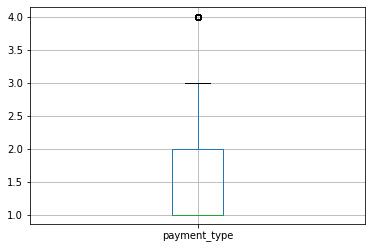

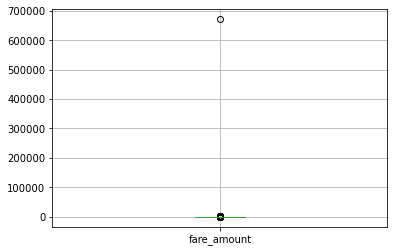

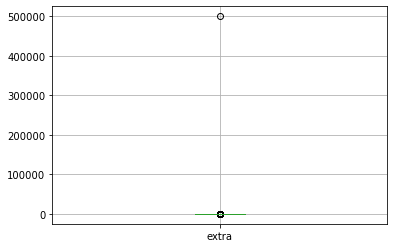

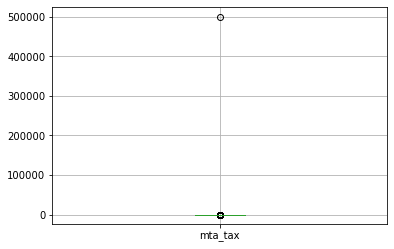

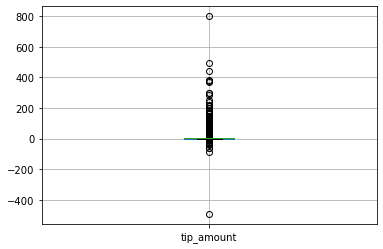

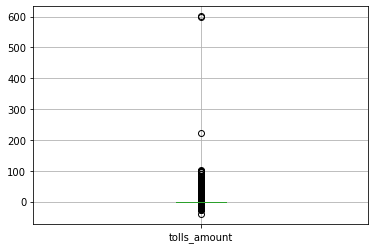

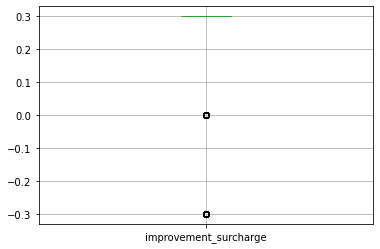

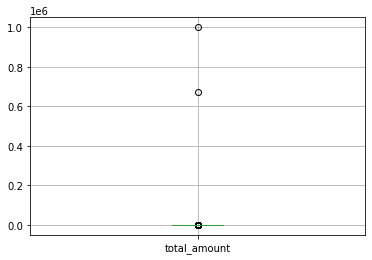

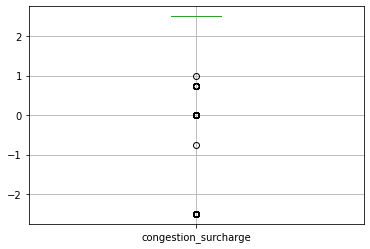

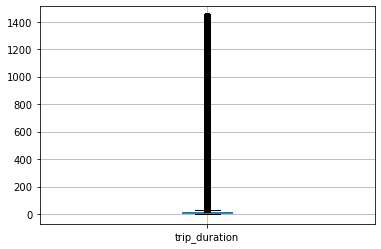

In [27]:
for i in range(len(df_marchcolumns)):
    plt.figure()
    df_march.boxplot(column=df_marchcolumns[i])

In [28]:
df_march = df_march.drop(df_march[(df_march.trip_duration < 0) | (df_march.total_amount > 30)].index)

In [29]:
df_march = df_march.drop(df_march[(df_march.tip_amount > 10) | (df_march.trip_distance > 10)].index)

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

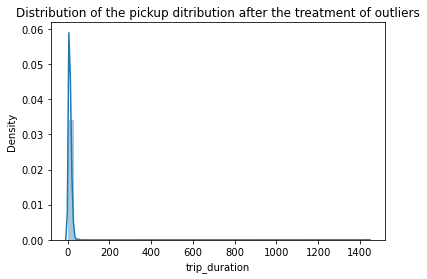

In [62]:
sns.distplot(df_march['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

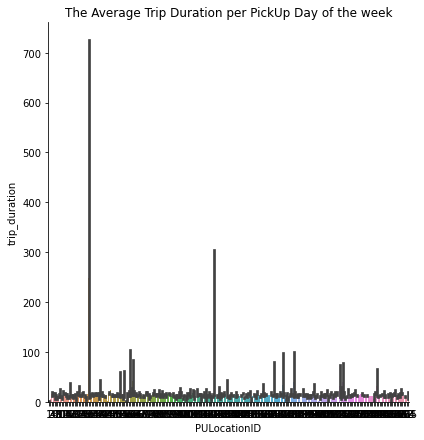

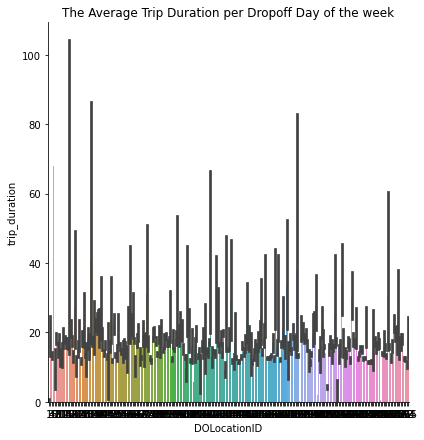

In [63]:
sns.catplot(x="PULocationID",y="trip_duration",kind="bar",data=df_march,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="DOLocationID",y="trip_duration",kind="bar",data=df_march,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')

<AxesSubplot:xlabel='trip_distance', ylabel='trip_duration'>

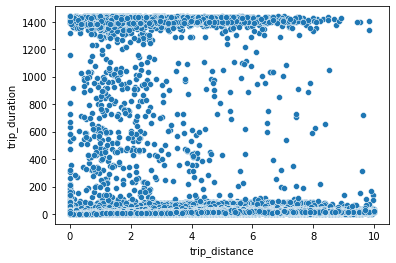

In [64]:
sns.scatterplot(x='trip_distance',y='trip_duration',data=df_march)

<AxesSubplot:xlabel='trip_duration', ylabel='total_amount'>

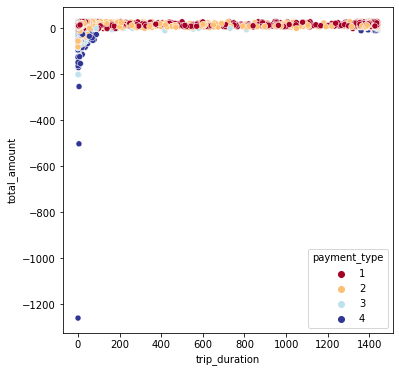

In [82]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.scatterplot(data =df_march, x = "trip_duration", y = "total_amount", hue = "payment_type", palette = "RdYlBu")

In [30]:
# Infer schema based on statistics
schema = tfdv.infer_schema(train_march_stats)
# Display schema inline in table format
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,optional,single,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,optional,single,-
'store_and_fwd_flag',STRING,optional,single,'store_and_fwd_flag'
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


,Values
Domain,
'store_and_fwd_flag',"'N', 'Y'"


In [31]:
df_march.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664833 entries, 0 to 2969878
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   PULocationID           int64  
 5   DOLocationID           int64  
 6   payment_type           int64  
 7   fare_amount            float64
 8   extra                  float64
 9   mta_tax                float64
 10  tip_amount             float64
 11  tolls_amount           float64
 12  improvement_surcharge  float64
 13  total_amount           float64
 14  congestion_surcharge   float64
 15  trip_duration          float64
dtypes: float64(12), int64(4)
memory usage: 345.6 MB


In [32]:
df_march.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
VendorID,1.000000,0.197863,0.027538,0.002599,-0.010804,-0.004406,-0.011238,-0.008702,-0.895826,-0.039780,0.010462,-0.003452,-0.045272,-0.007045,-0.015428,0.029162
passenger_count,0.197863,1.000000,0.009695,-0.005143,-0.004895,-0.002792,0.001913,0.007124,-0.172394,0.008113,-0.000068,0.000168,0.007150,0.008615,0.012117,0.015695
trip_distance,0.027538,0.009695,1.000000,-0.013398,-0.060873,-0.087641,0.016774,0.841362,-0.016485,0.033040,0.252302,0.052977,0.024927,0.783882,-0.053744,0.087814
RatecodeID,0.002599,-0.005143,-0.013398,1.000000,-0.000897,0.002067,0.017468,-0.005740,-0.012521,-0.075355,-0.011244,0.004794,-0.034269,-0.013749,-0.038068,-0.000549
PULocationID,-0.010804,-0.004895,-0.060873,-0.000897,1.000000,0.111201,-0.046438,-0.043873,0.031857,0.006843,0.026642,-0.008480,0.006330,-0.013837,0.147674,-0.005654
DOLocationID,-0.004406,-0.002792,-0.087641,0.002067,0.111201,1.000000,-0.048604,-0.066448,0.023599,0.003687,0.021992,-0.011697,0.004466,-0.036648,0.131039,-0.006854
payment_type,-0.011238,0.001913,0.016774,0.017468,-0.046438,-0.048604,1.000000,-0.073767,-0.042177,-0.261793,-0.680100,0.007636,-0.265371,-0.279265,-0.270125,-0.001073
fare_amount,-0.008702,0.007124,0.841362,-0.005740,-0.043873,-0.066448,-0.073767,1.000000,0.011131,0.247565,0.296035,0.050825,0.265350,0.949403,0.063375,0.105581
extra,-0.895826,-0.172394,-0.016485,-0.012521,0.031857,0.023599,-0.042177,0.011131,1.000000,0.081274,0.047157,-0.004691,0.076258,0.069076,0.189635,-0.024816
mta_tax,-0.039780,0.008113,0.033040,-0.075355,0.006843,0.003687,-0.261793,0.247565,0.081274,1.000000,0.081181,0.014268,0.953314,0.309549,0.408526,0.006361


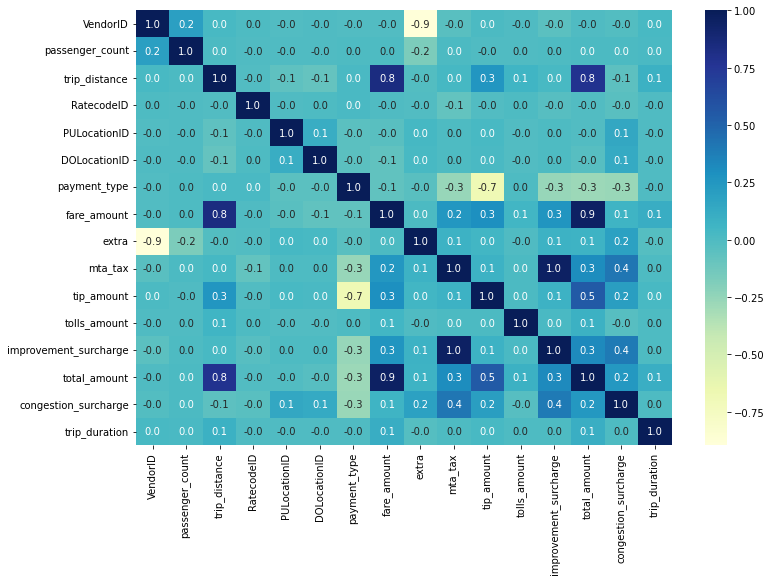

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df_march.corr(),cmap="YlGnBu",annot=True,fmt=".1f")
plt.show()

<AxesSubplot:xlabel='VendorID', ylabel='count'>

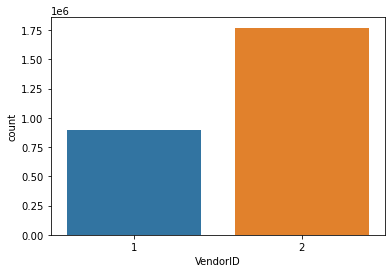

In [34]:
sns.countplot(x = "VendorID", data = df_march)

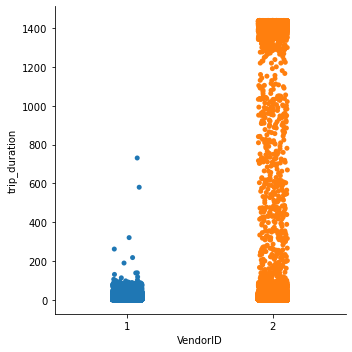

In [65]:
sns.catplot(x="VendorID", y="trip_duration",kind="strip",data=df_march)


In [36]:
% matplotlib.inline

UsageError: Line magic function `%` not found.


<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

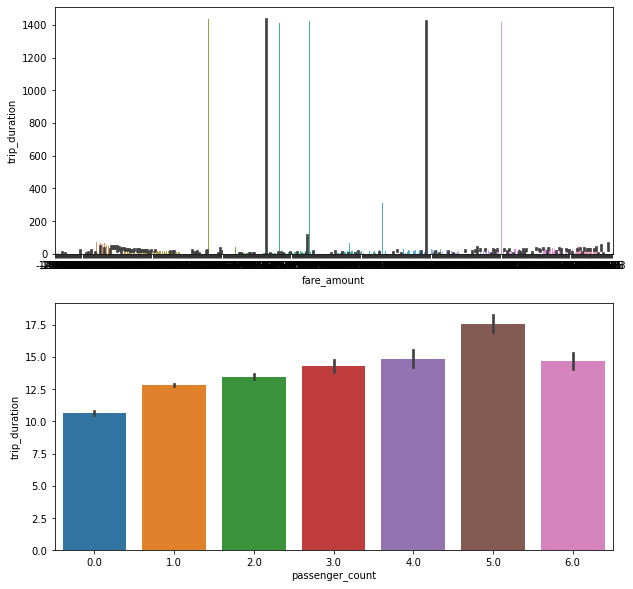

In [37]:
f, axes = plt.subplots(2, 1, figsize = (10,10))
sns.barplot(x = "fare_amount", y = "trip_duration", data =df_march, ax = axes[0])
sns.barplot(x = "passenger_count", y = "trip_duration", data =df_march, ax = axes[1])

## pickup_day_no and dropoff_day_no which will contain the day number with Monday=0 and Sunday=6.

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

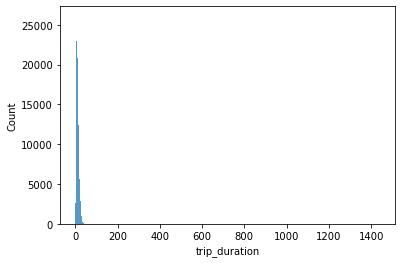

In [38]:
sns.histplot(df_march["trip_duration"]) #To check data after handling outliers

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


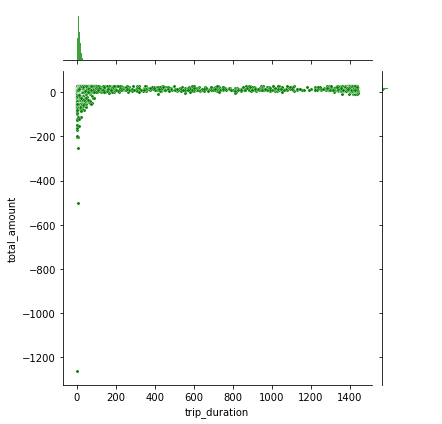

In [92]:
sns.jointplot('trip_duration','total_amount',data=df_march,s=10,alpha=1,color='green')

## Checking the Trip duration and the trip distance through visualization

In [39]:
pip install apache-beam[interactive]

Note: you may need to restart the kernel to use updated packages.


In [67]:
!pip install graphviz


In [69]:
import graphviz

In [53]:
pip install -U pandas-profiling[notebook]



In [55]:
from pandas_profiling import ProfileReport


In [56]:
profile = ProfileReport(df_may, minimal=True)
p  = profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
from IPython.display import HTML
HTML(filename='output.html')

Number of variables,19
Number of observations,348415
Missing cells,584019
Missing cells (%),8.8%
Total size in memory,50.5 MiB
Average record size in memory,152.0 B
Numeric,15
DateTime,2
Categorical,1
Unsupported,1
passenger_count has 58901 (16.9%) missing values,Missing


In [58]:
profile2 = ProfileReport(df_jan, minimal=True)
p2  = profile2.to_file("output2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
HTML(filename='output2.html')

Number of variables,19
Number of observations,6405008
Missing cells,6666772
Missing cells (%),5.5%
Total size in memory,928.5 MiB
Average record size in memory,152.0 B
Numeric,15
DateTime,2
Categorical,1
Unsupported,1
passenger_count has 65441 (1.0%) missing values,Missing


In [60]:
df_jan.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
VendorID,1.000000,0.182453,0.001915,0.007558,-0.012861,-0.006967,-0.031753,0.026618,-0.845994,-0.037395,0.017009,0.011698,-0.038739,0.025980,-0.011314,NaN
passenger_count,0.182453,1.000000,0.010643,-0.003391,-0.004243,-0.003451,0.010280,0.006597,-0.153478,0.004444,-0.001021,0.004097,0.004472,0.006659,0.013468,NaN
trip_distance,0.001915,0.010643,1.000000,0.149053,-0.005171,-0.004531,-0.003202,0.039619,0.000695,-0.003305,0.022724,0.025151,0.000854,0.039532,-0.211379,NaN
RatecodeID,0.007558,-0.003391,0.149053,1.000000,-0.009819,0.003530,0.006312,0.250237,-0.023739,-0.182299,0.145306,0.149928,-0.040373,0.244047,-0.107421,NaN
PULocationID,-0.012861,-0.004243,-0.005171,-0.009819,1.000000,0.100316,-0.017845,-0.086543,0.016987,0.012865,-0.030086,-0.047392,0.002822,-0.077221,0.124937,NaN
DOLocationID,-0.006967,-0.003451,-0.004531,0.003530,0.100316,1.000000,-0.017764,-0.089137,0.012372,0.026773,-0.030456,-0.056430,0.000211,-0.080550,0.120692,NaN
payment_type,-0.031753,0.010280,-0.003202,0.006312,-0.017845,-0.017764,1.000000,-0.087619,-0.063705,-0.118925,-0.418095,-0.048428,-0.226644,-0.168153,-0.201852,NaN
fare_amount,0.026618,0.006597,0.039619,0.250237,-0.086543,-0.089137,-0.087619,1.000000,-0.000920,-0.104003,0.528920,0.526764,0.107410,0.976689,-0.213275,NaN
extra,-0.845994,-0.153478,0.000695,-0.023739,0.016987,0.012372,-0.063705,-0.000920,1.000000,0.051249,0.000728,0.007875,0.066610,0.022569,0.187699,NaN
mta_tax,-0.037395,0.004444,-0.003305,-0.182299,0.012865,0.026773,-0.118925,-0.104003,0.051249,1.000000,-0.042102,-0.136180,0.738633,-0.083315,0.395538,NaN


### JAN 2020 and March compare

In [46]:
from tensorflow_data_validation.statistics import stats_options as options

In [47]:
jan_stats= tfdv.generate_statistics_from_dataframe(df_jan, stats_options=options.StatsOptions())
type(jan_stats)

tensorflow_metadata.proto.v0.statistics_pb2.DatasetFeatureStatisticsList

In [48]:
tfdv.visualize_statistics(lhs_statistics=train_march_stats,rhs_statistics=jan_stats,lhs_name='MARCH_DATASET',rhs_name='JANUARY_DATASET')

In [49]:
may_test_stats= tfdv.generate_statistics_from_dataframe(df_jan, stats_options=options.StatsOptions())
type(may_test_stats)

tensorflow_metadata.proto.v0.statistics_pb2.DatasetFeatureStatisticsList

## May and March compare

In [50]:
tfdv.visualize_statistics(lhs_statistics=may_test_stats,rhs_statistics=train_march_stats,lhs_name='TestingDS',rhs_name='TrainingDS')